# Tensorflow tutorial on image classification 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import cv2
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [80]:
#import pathlib

#data_dir = "file://Users/admin/Dropbox/Second\ Year/Software\ Engineering/Assessment/shrooming/Mushrooms/"
#image_count = len(list(data_dir.glob('*/*.jpg')))
#print(image_count)

In [78]:
#import pathlib
#dataset_url = "file://Users/admin/Dropbox/Second\ Year/Software\ Engineering/Assessment/shrooming/shroomImages/"
#data_dir = tf.keras.utils.get_file('shroomImages', dataset_url)
#data_dir = pathlib.Path(data_dir)


In [79]:
#import pathlib
#myFile = 'shroomImages'
#fullPath = os.path.abspath("./" + myFile) # or similar, depending on your scenario

#data_dir = keras.utils.get_file(myFile, 'file:/'+fullPath, untar=True)
#data_dir = pathlib.Path(data_dir)

#print(fullPath)
#print(data_dir)

In [81]:
import pathlib
dataset_url = "https://www.kaggle.com/maysee/mushrooms-classification-common-genuss-images/download"
data_dir = tf.keras.utils.get_file('archive', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

   8192/Unknown - 0s 0us/step

In [66]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

0


In [85]:
tfds.folder_dataset.ImageFolder(Users/admin/Dropbox/Second\ Year/Software\ Engineering/Assessment/shrooming/shroomImages/)

SyntaxError: unexpected character after line continuation character (<ipython-input-85-e44222f2f274>, line 1)

/Users/admin/Dropbox/Second Year/Software Engineering/Assessment/shrooming/shroomImages


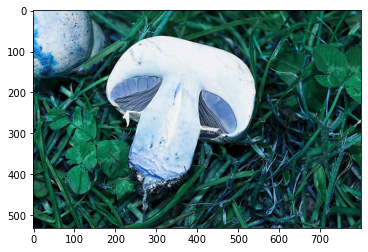

In [5]:
import pathlib
myFile = 'shroomImages'
data_dir = os.path.abspath("./" + myFile) # or similar, depending on your scenario
print(data_dir)

categories = ['Agaricus', 'Amanita', 'Boletus', 'Cortinarius', 'Entoloma', 'Hygrocybe', 'Lactarius', 'Russula', 'Suillus']

for category in categories:
    path = os.path.join(data_dir, category)
    for img in os.listdir(path):
        #images have been converted into greyscale
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show
        break
    break
    print(img_array)

In [6]:
training_data=[]
def create_training_data():
    for category in categories:
        path = os.path.join(data_dir, category)
        for img in os.listdir(path):
            #images have been converted into greyscale
            img_array = cv2.imread(os.path.join(path,img))

    

In [2]:
batch_size = 32
img_height = 180
img_width = 180

import pathlib
myFile = 'shroomImages'
data_dir = os.path.abspath("./" + myFile) # or similar, depending on your scenario

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6713 files belonging to 9 classes.
Using 5371 files for training.


In [3]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6713 files belonging to 9 classes.
Using 1342 files for validation.


In [4]:
class_names = train_ds.class_names
print(class_names)

['Agaricus', 'Amanita', 'Boletus', 'Cortinarius', 'Entoloma', 'Hygrocybe', 'Lactarius', 'Russula', 'Suillus']


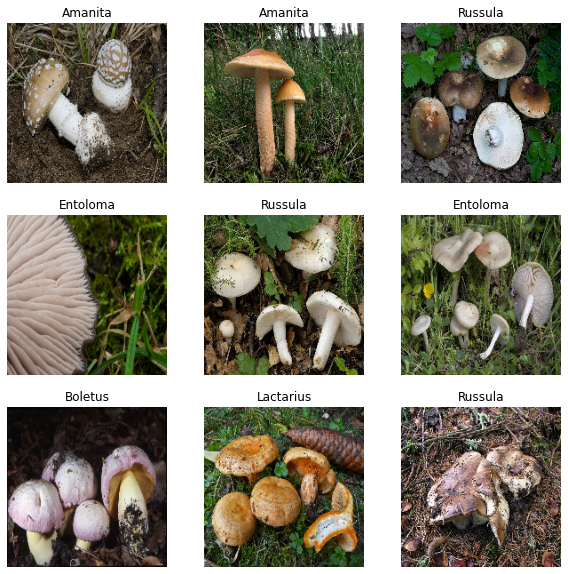

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [6]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [7]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [8]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [9]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [10]:
num_classes = 9

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0

In [13]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
168/168 [==============================] - 158s 933ms/step - loss: 2.1429 - accuracy: 0.1952 - val_loss: 1.8618 - val_accuracy: 0.2943
Epoch 2/10
168/168 [==============================] - 141s 839ms/step - loss: 1.8041 - accuracy: 0.3250 - val_loss: 1.7515 - val_accuracy: 0.3726
Epoch 3/10
168/168 [==============================] - 142s 847ms/step - loss: 1.5661 - accuracy: 0.4373 - val_loss: 1.6726 - val_accuracy: 0.4098
Epoch 4/10
168/168 [==============================] - 147s 872ms/step - loss: 1.2778 - accuracy: 0.5471 - val_loss: 1.7354 - val_accuracy: 0.4255
Epoch 5/10
168/168 [==============================] - 153s 909ms/step - loss: 0.8983 - accuracy: 0.6938 - val_loss: 1.9903 - val_accuracy: 0.3934
Epoch 6/10
168/168 [==============================] - 142s 847ms/step - loss: 0.5146 - accuracy: 0.8311 - val_loss: 2.5933 - val_accuracy: 0.3927
Epoch 7/10
168/168 [==============================] - 185s 1s/step - loss: 0.2231 - accuracy: 0.9349 - val_loss: 3.4290 - va

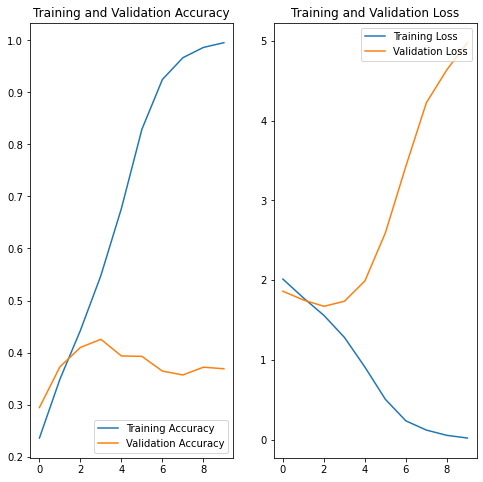

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [15]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

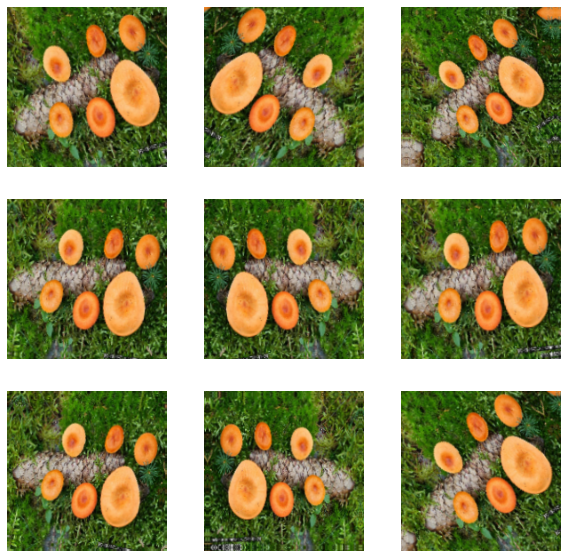

In [16]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [18]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [20]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_3 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 45, 45, 64)       

In [22]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
168/168 [==============================] - 170s 1000ms/step - loss: 2.0191 - accuracy: 0.2389 - val_loss: 1.9767 - val_accuracy: 0.2481
Epoch 2/15
168/168 [==============================] - 156s 930ms/step - loss: 1.7874 - accuracy: 0.3436 - val_loss: 1.8237 - val_accuracy: 0.3443
Epoch 3/15
168/168 [==============================] - 155s 925ms/step - loss: 1.6974 - accuracy: 0.3884 - val_loss: 1.8166 - val_accuracy: 0.3547
Epoch 4/15
168/168 [==============================] - 158s 938ms/step - loss: 1.6344 - accuracy: 0.4216 - val_loss: 1.6625 - val_accuracy: 0.4001
Epoch 5/15
168/168 [==============================] - 160s 945ms/step - loss: 1.5659 - accuracy: 0.4371 - val_loss: 1.8106 - val_accuracy: 0.3741
Epoch 6/15
168/168 [==============================] - 154s 916ms/step - loss: 1.5234 - accuracy: 0.4450 - val_loss: 1.6801 - val_accuracy: 0.4031
Epoch 7/15
168/168 [==============================] - 170s 1s/step - loss: 1.4736 - accuracy: 0.4653 - val_loss: 1.7085 - v

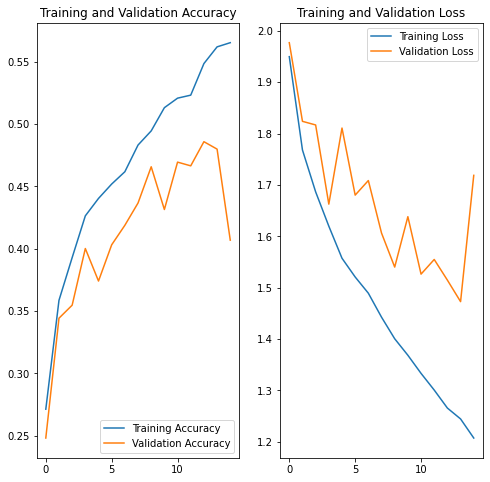

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [29]:
mushroom_url = "https://images.immediate.co.uk/production/volatile/sites/23/2019/10/GettyImages-521500804FloWBo-143d194.jpg"
mushroom_path = tf.keras.utils.get_file('GettyImages-521500804FloWBo-143d194.jpg', origin=mushroom_url)

img = keras.preprocessing.image.load_img(
    mushroom_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

212992/212460 [==============================] - 0s 0us/step
This image most likely belongs to Amanita with a 40.50 percent confidence.
